In [29]:
# Bernstein-Vazirani
%matplotlib inline
from random import randint
from qiskit import *

In [30]:
# Step 0: Generate a secret string
secret_string = bin(randint(0, 2**7 - 1))[2:]
N = len(secret_string)

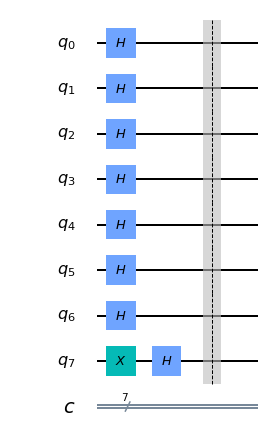

In [31]:
# Step 1: Prepare the state with superpositions
prep_circuit = QuantumCircuit(N+1, N)
prep_circuit.x(N)  # working qubit starts with |1>
prep_circuit.h(range(N+1))
prep_circuit.barrier()
prep_circuit.draw(output="mpl")

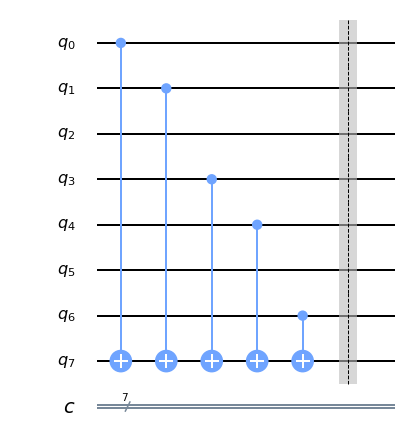

In [32]:
# Step 2: send the query to the quantum oracle. Here, we prepare the quantum oracle
oracle_circuit = QuantumCircuit(N+1, N, name="Blackbox")

for index, value in enumerate(secret_string):
    if value == "1":
        oracle_circuit.cx(index, N)  # XOR with working qubit

oracle_circuit.barrier()
oracle_circuit.draw(output="mpl")

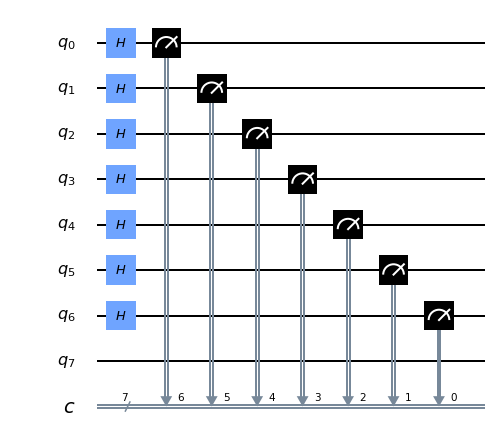

In [33]:
# Step 3: Apply Hadamard gates and measure
measure_circuit = QuantumCircuit(N+1, N)
measure_circuit.h(range(N))
measure_circuit.measure(
    list(range(N)), 
    list(reversed(range(N)))
)
measure_circuit.draw(output="mpl")

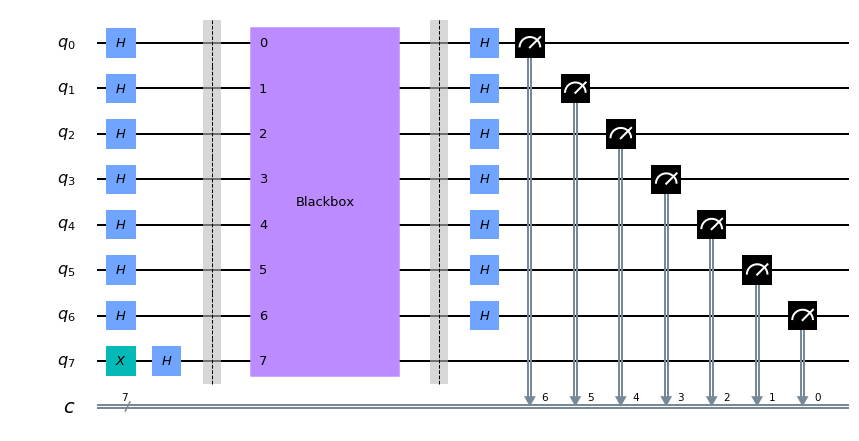

In [34]:
# We now merge the circuit together
circuit = QuantumCircuit(N+1, N)
circuit += prep_circuit
circuit.append(oracle_circuit.to_instruction(), range(N+1))  # We do this to "hide" the oracle from the viewer
circuit.barrier()
circuit += measure_circuit
circuit.draw(output="mpl")

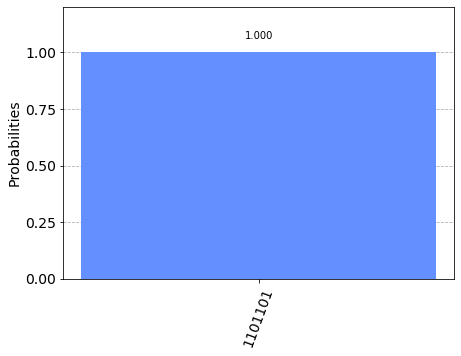

In [35]:
# We simulate to discover the hidden string
simulator = Aer.get_backend("qasm_simulator")
job = execute(circuit, simulator, shots=512)
results = job.result()
visualization.plot_histogram(results.get_counts())

In [41]:
# Was the guess right? Let's discover
print("Hidden string {}\nGuess {}".format(
    secret_string, list(results.get_counts().keys())[0])
)
if list(results.get_counts().keys())[0] == secret_string:
    print("The guess was correct!")
else:
    print("The guess was not correct")

Hidden string 1101101
Guess 1101101
The guess was correct!


In [42]:
# For purposes of reproducibility, the Qiskit version is
qiskit.__qiskit_version__

{'qiskit-terra': '0.11.0',
 'qiskit-aer': '0.3.4',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.4.4',
 'qiskit-aqua': '0.6.1',
 'qiskit': '0.14.0'}